In [1]:
from __future__ import absolute_import, division, print_function
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.  
import os
print(os.listdir("../input/cell_images/cell_images"))

['Parasitized', 'Uninfected']


In [3]:
!ls

__notebook__.ipynb  __output__.json


In [4]:
infected = os.listdir('../input/cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('../input/cell_images/cell_images/Uninfected/')

In [5]:
images =[]
classes=[]
for class_folder_name in os.listdir('../input/cell_images/cell_images'):
    class_folder_path = os.path.join('../input/cell_images/cell_images', class_folder_name)
    class_label = class_folder_name
    classes.append(class_label)

In [6]:
data=[]
labels=[]
Parasitized=os.listdir("../input/cell_images/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("../input/cell_images/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50,50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
    

In [7]:
Cells=np.array(data)
labels=np.array(labels)

Text(0.5,0.98,'Categorical Plotting')

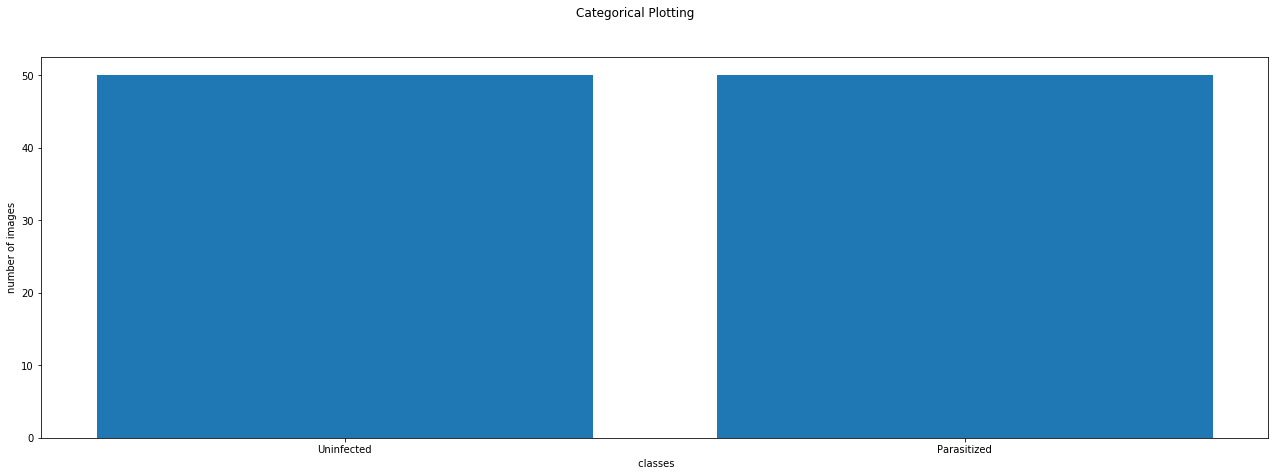

In [8]:
values =[]
labe=[]
for label in set(classes):
  values.append(len(data[classes == label]))
  labe.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labe,values
      )
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [9]:
np.save("Cells",Cells)
np.save("labels",labels)

In [10]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [11]:

print('Cells : {} | labels : {}'.format(Cells.shape , labels.shape))

Cells : (27558, 50, 50, 3) | labels : (27558,)


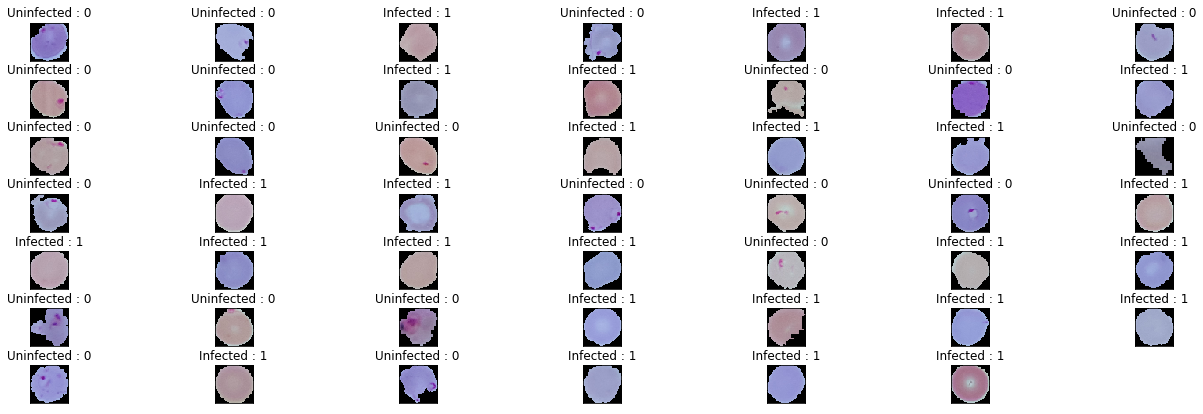

In [12]:
plt.figure(1 , figsize = (22, 7))
n = 0 
for i in range(48):
    n += 1 
    r = np.random.randint(0 , Cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(Cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Uninfected',labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [13]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

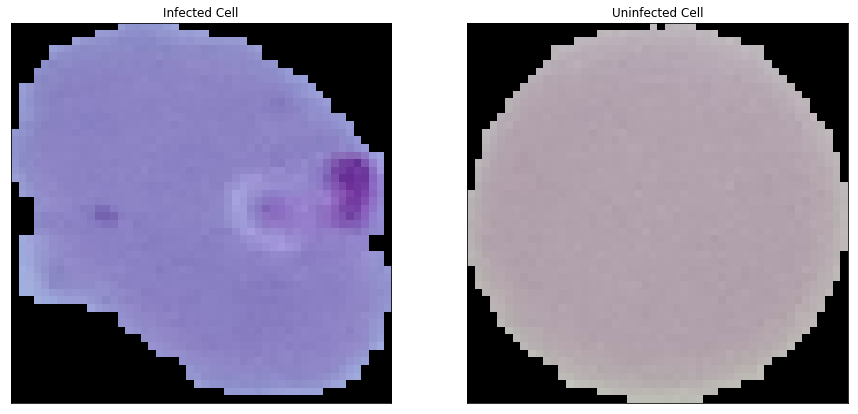

In [14]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(Cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(Cells[26558])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [15]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [16]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [17]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [18]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [19]:
#creating sequential model for single layer
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               5000500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1002      
Total para

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
24803/24803 [==============================] - 9s 358us/step - loss: 0.6099 - acc: 0.6852
Epoch 2/20
24803/24803 [==============================] - 7s 270us/step - loss: 0.4575 - acc: 0.7939
Epoch 3/20
24803/24803 [==============================] - 7s 268us/step - loss: 0.3199 - acc: 0.8709
Epoch 4/20
24803/24803 [==============================] - 7s 267us/step - loss: 0.2473 - acc: 0.9038
Epoch 5/20
24803/24803 [==============================] - 7s 266us/step - loss: 0.2152 - acc: 0.9198
Epoch 6/20
24803/24803 [==============================] - 7s 266us/step - loss: 0.1880 - acc: 0.9305
Epoch 7/20
24803/24803 [==============================] - 7s 267us/step - loss: 0.1613 - acc: 0.9423
Epoch 8/20
24803/24803 [==============================] - 7s 267us/step - loss: 0.1425 - acc: 0.9490
Epoch 9/20
24803/24803 [==============================] - 7s 267us/step - loss: 0.1199 - acc: 0.9573
Epoch 10/20
24803/24803 [==============================] - 7s 267us/step - loss: 0.1030 - a

In [22]:
#accuracy of the model when single layer is used
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

2755/2755 [==============================] - 0s 112us/step

 Test_Accuracy:- 0.9277676950998185


In [23]:
#Adding more layers to test the accuracy
#creating sequential model for 3 convultion layers
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
__________

In [24]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
#Fit the model with min batch size as 50[can tune batch size to some factor of 2^power ] 
model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
24803/24803 [==============================] - 6s 244us/step - loss: 0.3034 - acc: 0.8691
Epoch 2/20
24803/24803 [==============================] - 5s 218us/step - loss: 0.1512 - acc: 0.9534
Epoch 3/20
24803/24803 [==============================] - 5s 218us/step - loss: 0.1354 - acc: 0.9573
Epoch 4/20
24803/24803 [==============================] - 5s 219us/step - loss: 0.1277 - acc: 0.9585
Epoch 5/20
24803/24803 [==============================] - 5s 216us/step - loss: 0.1189 - acc: 0.9606
Epoch 6/20
24803/24803 [==============================] - 5s 217us/step - loss: 0.1108 - acc: 0.9613
Epoch 7/20
24803/24803 [==============================] - 5s 218us/step - loss: 0.1041 - acc: 0.9643
Epoch 8/20
24803/24803 [==============================] - 5s 217us/step - loss: 0.0973 - acc: 0.9658
Epoch 9/20
24803/24803 [==============================] - 5s 217us/step - loss: 0.0954 - acc: 0.9656
Epoch 10/20
24803/24803 [==============================] - 5s 217us/step - loss: 0.0856 - a

In [26]:
#accuracy when more number of layers are added
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

2755/2755 [==============================] - 0s 131us/step

 Test_Accuracy:- 0.949546279491833


In [27]:
model.history.history.keys()

dict_keys(['loss', 'acc'])

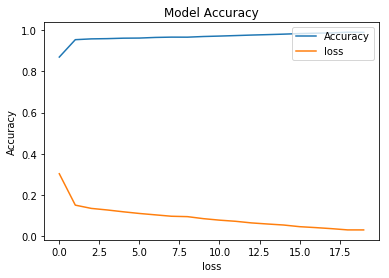

In [28]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['Accuracy', 'loss'], loc='upper right')
plt.show()